In [5]:
import pandas as pd
import numpy as np
import math
import pickle
from sqlalchemy import create_engine
from matplotlib import pyplot as plt

In [2]:
# データベースの情報
server = 'gciteam16.database.windows.net'
database = 'mynavi-database'
username = 'gciteam16'
password = 'Password0'
port =1433

In [3]:
# 接続エンジンの作成
engine_config = "?driver=ODBC+Driver+13+for+SQL+Server?charset=shift-jis"
db_settings = {
    "host": server,
    "database": database,
    "user": username,
    "password": password,
    "port":port,
    "config_query":engine_config
}
engine = create_engine('mssql+pyodbc://{user}:{password}@{host}:{port}/{database}{config_query}'.format(**db_settings))

In [4]:
query = "SELECT * FROM analytical_data_table"
analytical_data = pd.read_sql(query, con=engine)

# 分析データの確認

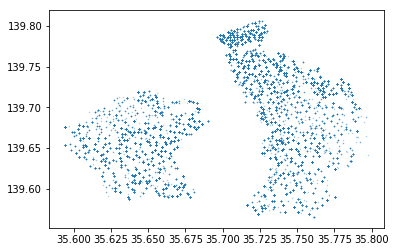

In [14]:
plt.scatter(analytical_data.address_lat, analytical_data.address_lng,s=0.2,alpha=0.4)
plt.show()

In [9]:
#with open('../../gci_project_storage/analytical_data.pickle', mode='rb') as f:
#     analytical_data = pickle.load(f)

In [15]:
analytical_data = analytical_data.reindex(np.random.permutation(analytical_data.index))

In [16]:
X = analytical_data.iloc[:,1:]
y = analytical_data.iloc[:,:1]

In [ ]:
model_r = RandomForestRegressor(n_estimators=100)
#model_l = LinearRegression()

model_r.fit(X.iloc[:20000,:],y.iloc[:20000,:])
#model_l.fit(X,y)

print(model_r.score(X.iloc[20000:,:],y.iloc[20000:,:]))
#model_l.score(X,y)

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.cross_validation import cross_val_score

models = [
    LinearRegression()
    ,Lasso(alpha=0.05)
    ,Lasso(alpha=0.1)
    ,Lasso(alpha=0.2)
    ,Ridge(alpha=0.05)
    ,Ridge(alpha=0.1)
    ,Ridge(alpha=0.2)
    ,RandomForestRegressor(n_estimators=100)
    ,LinearSVR()
    ]

In [20]:
for model in models:
    scores = cross_val_score(model, X, y,cv=4)
    print(model.__class__.__name__, "   \tscores:\t", scores )
    
# どのモデルも、CVで出した決定係数がとてつもなく低い

LinearRegression    	scores:	 [  8.75822767e-01   8.80144937e-01  -3.17750329e+11   8.77930737e-01]


C:\Anaconda\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso    	scores:	 [ 0.8759054   0.88044425  0.87105242  0.87845048]


C:\Anaconda\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso    	scores:	 [ 0.87580598  0.88023772  0.8708505   0.87866223]


C:\Anaconda\envs\py35\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso    	scores:	 [ 0.87533903  0.87993652  0.87061728  0.87892595]
Ridge    	scores:	 [ 0.87564519  0.88042932  0.87083563  0.87879248]
Ridge    	scores:	 [ 0.87522862  0.88018355  0.87061893  0.8789732 ]
Ridge    	scores:	 [ 0.87428318  0.87948911  0.87000827  0.87892544]


C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

RandomForestRegressor    	scores:	 [ 0.9757999   0.97817942  0.97546073  0.97751582]


C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

LinearSVR    	scores:	 [ 0.1497063   0.05384213  0.106972    0.13879775]


In [ ]:
list_n_estimators = [5,10,15,20,30,40,50,60,70,80,90,100,125,150,200,300,500]
list_scores = []
for n_est in list_n_estimators:
    model_r = RandomForestRegressor(n_estimators=n_est)
    model_r.fit(X.iloc[:20000,:],y.iloc[:20000,:])
    list_scores.append(model_r.score(X.iloc[20000:,:],y.iloc[20000:,:]))
plt.plot(list_n_estimators,list_scores,'b')
plt.show()
list_scores

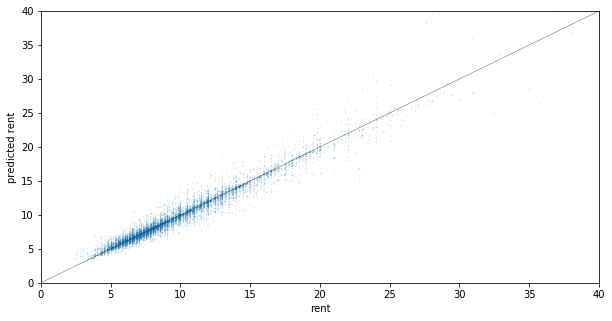

In [66]:
plt.figure(figsize=(10,5))

y_pred = model_r.predict(X)
plt.scatter(x=y.rent[20000:],y=y_pred[20000:],s=0.1,alpha=0.2)
plt.xlim(0,40)
plt.ylim(0,40)
plt.xlabel("rent")
plt.ylabel("predicted rent")
plt.plot([0,40],[0,40],c="black",linewidth=0.3)
plt.show()